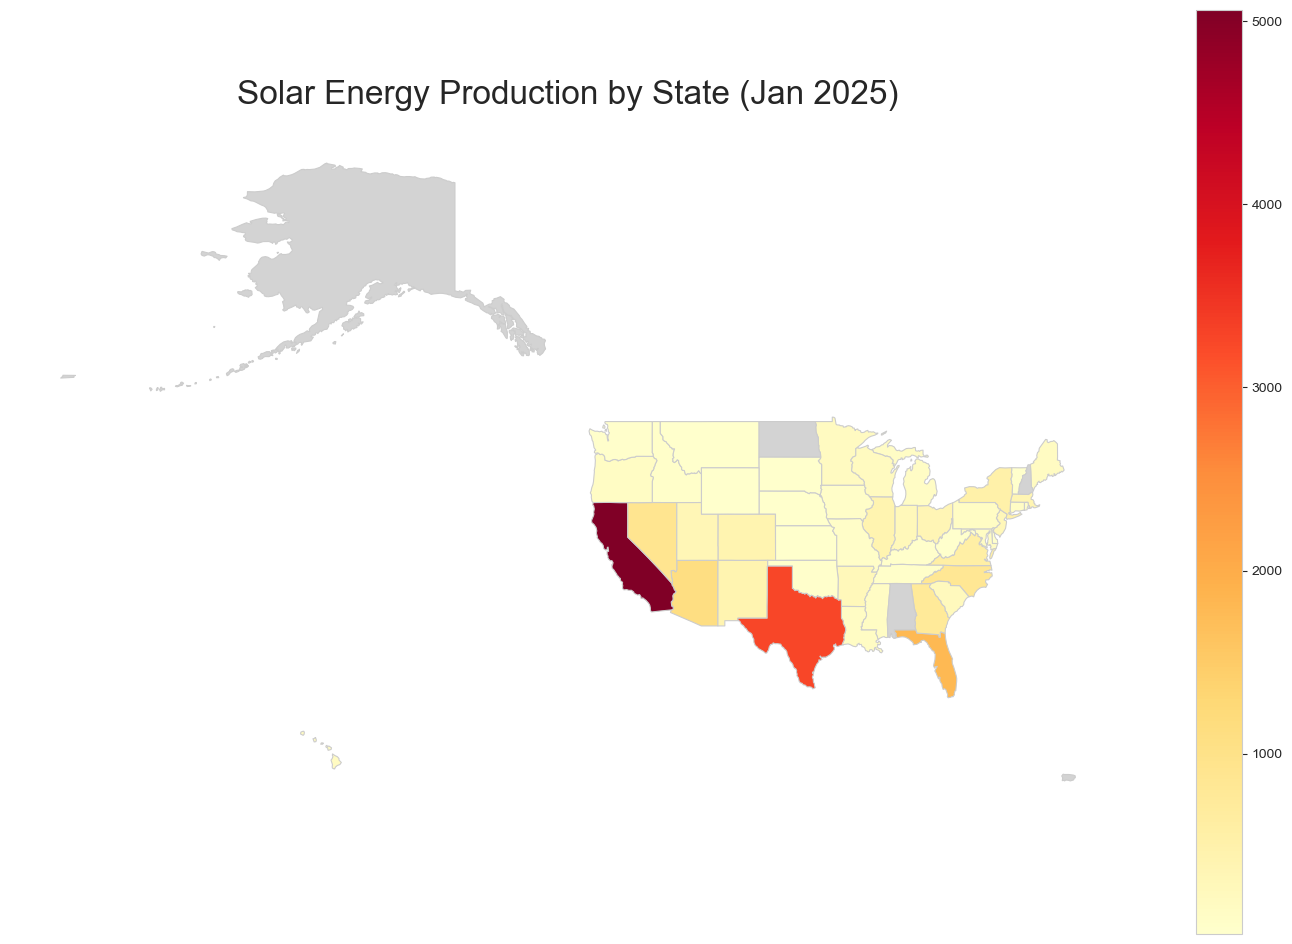

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Prepare solar production data ---
solar_data = {
    'State': ['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
              'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
              'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
              'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
              'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
              'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
              'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
              'Wisconsin', 'Wyoming'],
    'Jan2025_Production': [None, 1116, 280, 5061, 425, 124, 22, 1805, 759, 170, 63, 424, 283, 87,
                            18, 44, 148, 161, 149, 374, 116, 177, 145, 89, 21, 16, 898, None, 301, 423,
                            518, 833, None, 366, 41, 138, 138, 59, 233, 19, 72, 3259, 342, 24, 584, 48,
                            17, 195, 28]
}
solar_df = pd.DataFrame(solar_data)

# --- Step 2: Load local US States map ---
# Built-in `geopandas` simple US states map
gdf_states = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

# --- Step 3: Merge solar data with map data ---
gdf_states = gdf_states.rename(columns={"name": "State"})

# Merge
merged = gdf_states.merge(solar_df, on="State", how="left")

# --- Step 4: Plot ---
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(18, 12))

merged.plot(
    column='Jan2025_Production',
    cmap='YlOrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    missing_kwds={"color": "lightgrey", "label": "No Data"}
)

ax.set_title("Solar Energy Production by State (Jan 2025)", fontdict={'fontsize': 24}, pad=20)
ax.set_axis_off()

plt.show()


AttributeError: 'NoneType' object has no attribute 'set_bbox_to_anchor'

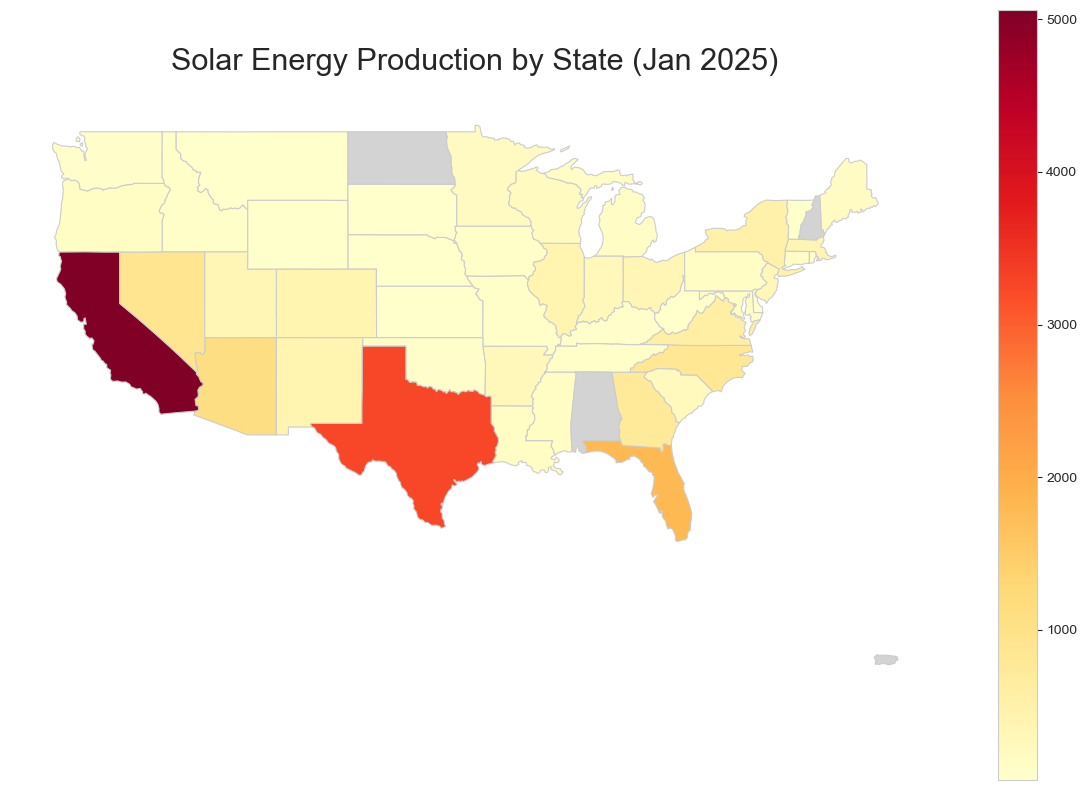

In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Prepare solar production data ---
solar_data = {
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
              'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
              'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
              'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
              'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
              'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
              'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
              'Wisconsin', 'Wyoming'],
    'Jan2025_Production': [None, None, 1116, 280, 5061, 425, 124, 22, 1805, 759, 170, 63, 424, 283, 87,
                            18, 44, 148, 161, 149, 374, 116, 177, 145, 89, 21, 16, 898, None, 301, 423,
                            518, 833, None, 366, 41, 138, 138, 59, 233, 19, 72, 3259, 342, 24, 584, 48,
                            17, 195, 28]
}
solar_df = pd.DataFrame(solar_data)

# --- Step 2: Load US states map ---
gdf_states = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

# Rename for merge
gdf_states = gdf_states.rename(columns={"name": "State"})

# --- Step 3: Merge solar production data ---
merged = gdf_states.merge(solar_df, on="State", how="left")

# --- Step 4: Remove Alaska and Hawaii ---
merged = merged[~merged['State'].isin(['Alaska', 'Hawaii'])]

# --- Step 5: Plot ---
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot map
plot = merged.plot(
    column='Jan2025_Production',
    cmap='YlOrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    missing_kwds={"color": "lightgrey", "label": "No Data"}
)

# Title
ax.set_title("Solar Energy Production by State (Jan 2025)", fontdict={'fontsize': 22}, pad=20)
ax.set_axis_off()

# Move the legend inside the map
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))  # Move to right center

plt.tight_layout()
plt.show()


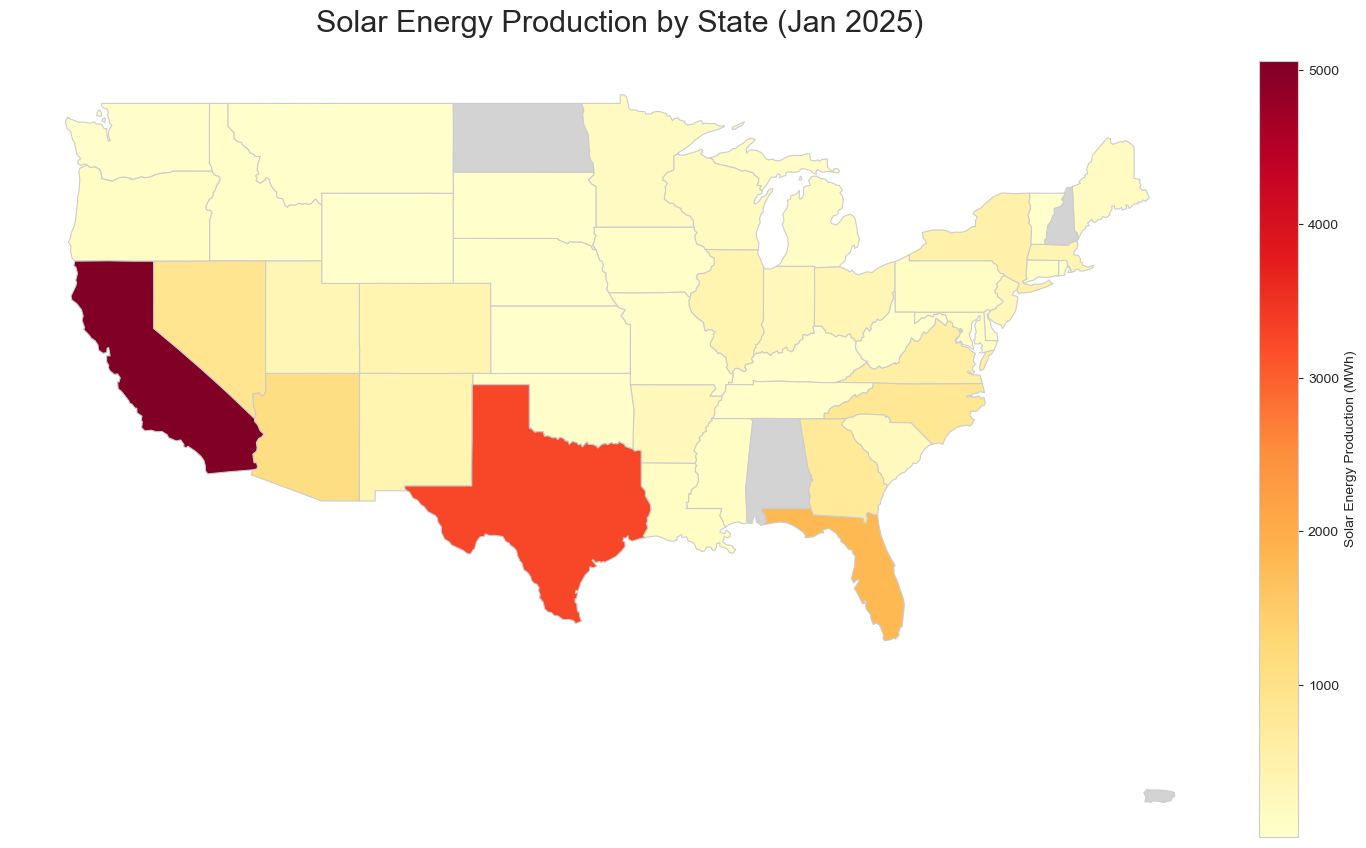

In [11]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Prepare solar production data ---
solar_data = {
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
              'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
              'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
              'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
              'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
              'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
              'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
              'Wisconsin', 'Wyoming'],
    'Jan2025_Production': [None, None, 1116, 280, 5061, 425, 124, 22, 1805, 759, 170, 63, 424, 283, 87,
                            18, 44, 148, 161, 149, 374, 116, 177, 145, 89, 21, 16, 898, None, 301, 423,
                            518, 833, None, 366, 41, 138, 138, 59, 233, 19, 72, 3259, 342, 24, 584, 48,
                            17, 195, 28]
}
solar_df = pd.DataFrame(solar_data)

# --- Step 2: Load US states map ---
gdf_states = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

# Rename for merge
gdf_states = gdf_states.rename(columns={"name": "State"})

# --- Step 3: Merge solar production data ---
merged = gdf_states.merge(solar_df, on="State", how="left")

# --- Step 4: Remove Alaska and Hawaii ---
merged = merged[~merged['State'].isin(['Alaska', 'Hawaii'])]

# --- Step 5: Plot ---
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot map with controlled legend position
merged.plot(
    column='Jan2025_Production',
    cmap='YlOrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={
        'label': "Solar Energy Production (MWh)",
        'orientation': "vertical",
        'shrink': 0.8,  # Shrink legend size
        'pad': 0.02
    },
    missing_kwds={"color": "lightgrey", "label": "No Data"}
)

# Title
ax.set_title("Solar Energy Production by State (Jan 2025)", fontdict={'fontsize': 22}, pad=20)
ax.set_axis_off()

plt.tight_layout()
plt.savefig('State Solar Production.png', dpi=300, bbox_inches='tight')
plt.show()


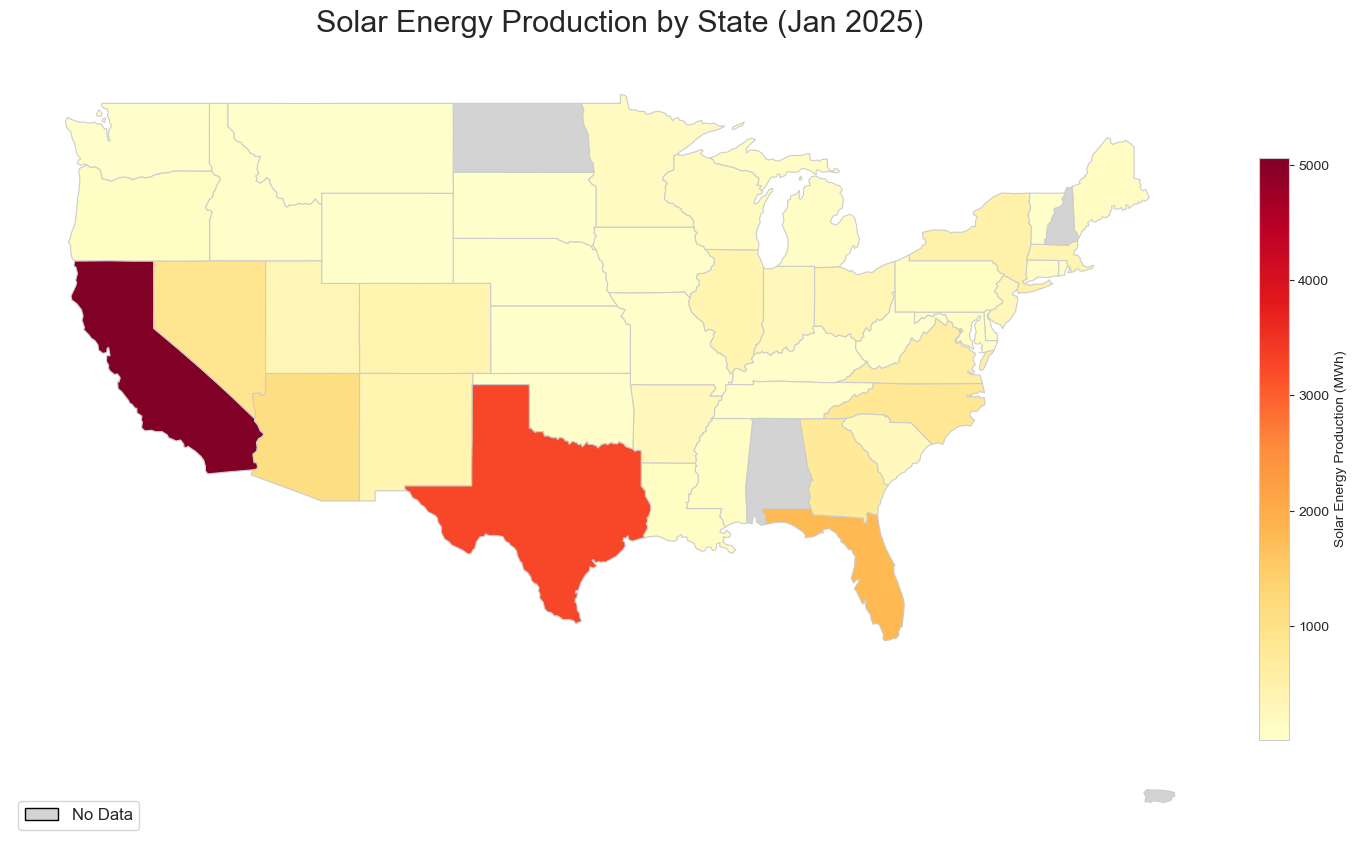

In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# --- Step 1: Prepare solar production data ---
solar_data = {
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
              'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
              'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
              'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
              'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
              'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
              'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
              'Wisconsin', 'Wyoming'],
    'Jan2025_Production': [None, None, 1116, 280, 5061, 425, 124, 22, 1805, 759, 170, 63, 424, 283, 87,
                            18, 44, 148, 161, 149, 374, 116, 177, 145, 89, 21, 16, 898, None, 301, 423,
                            518, 833, None, 366, 41, 138, 138, 59, 233, 19, 72, 3259, 342, 24, 584, 48,
                            17, 195, 28]
}
solar_df = pd.DataFrame(solar_data)

# --- Step 2: Load US states map ---
gdf_states = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')
gdf_states = gdf_states.rename(columns={"name": "State"})

# --- Step 3: Merge solar production data ---
merged = gdf_states.merge(solar_df, on="State", how="left")

# --- Step 4: Remove Alaska and Hawaii ---
merged = merged[~merged['State'].isin(['Alaska', 'Hawaii'])]

# --- Step 5: Plot ---
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot map
merged.plot(
    column='Jan2025_Production',
    cmap='YlOrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={
        'label': "Solar Energy Production (MWh)",
        'orientation': "vertical",
        'shrink': 0.6,
        'pad': 0.02
    },
    missing_kwds={"color": "lightgrey"}
)

# Add a custom patch for "No Data"
no_data_patch = Patch(facecolor='lightgrey', edgecolor='black', label='No Data')
ax.legend(handles=[no_data_patch], loc='lower left', fontsize='large')

# Title and layout
ax.set_title("Solar Energy Production by State (Jan 2025)", fontdict={'fontsize': 22}, pad=20)
ax.set_axis_off()

plt.tight_layout()
plt.savefig('State Solar Production_2.png', dpi=300, bbox_inches='tight')
plt.show()


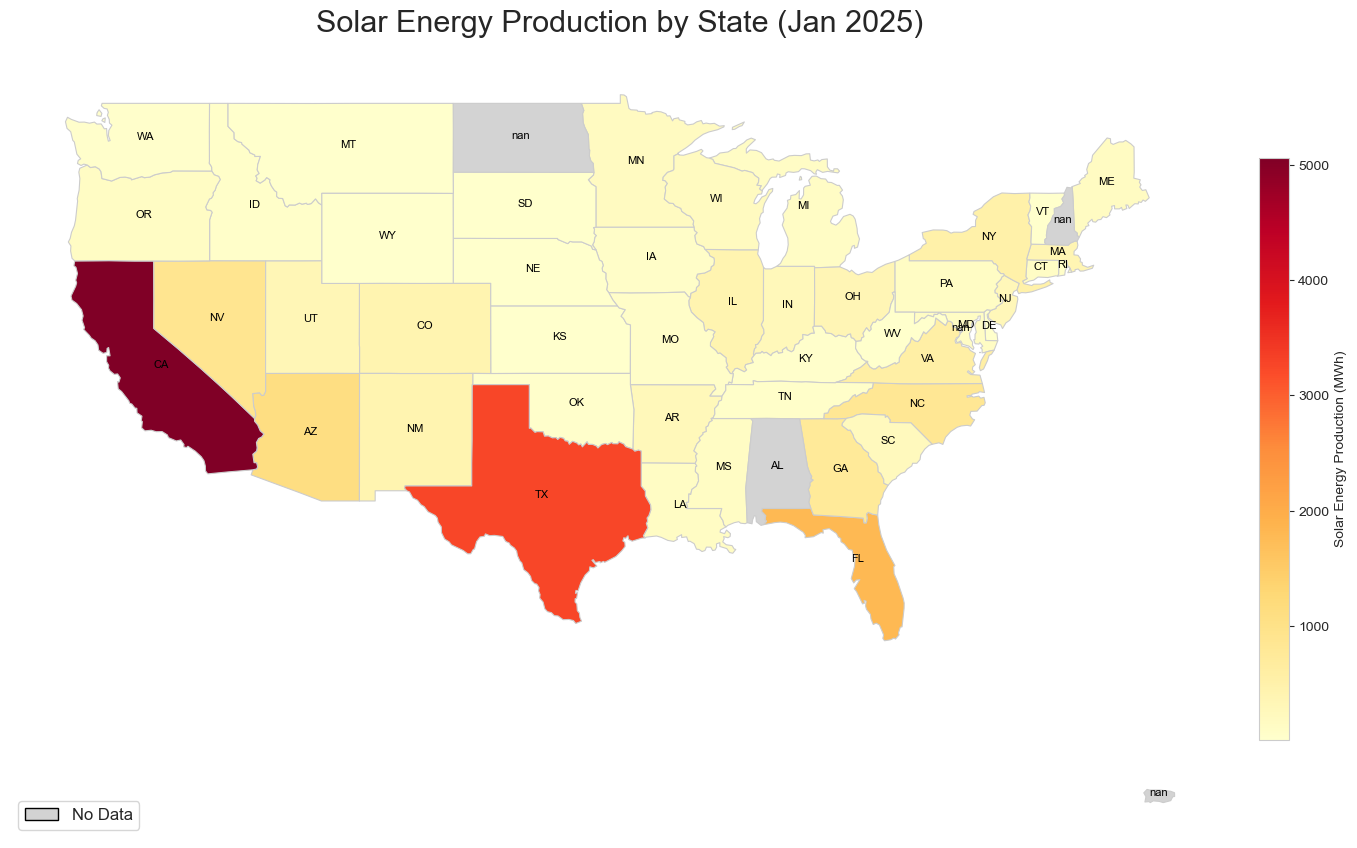

In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# --- Step 1: Prepare solar production data ---
solar_data = {
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
              'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
              'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
              'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
              'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
              'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
              'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
              'Wisconsin', 'Wyoming'],
    'Jan2025_Production': [None, None, 1116, 280, 5061, 425, 124, 22, 1805, 759, 170, 63, 424, 283, 87,
                            18, 44, 148, 161, 149, 374, 116, 177, 145, 89, 21, 16, 898, None, 301, 423,
                            518, 833, None, 366, 41, 138, 138, 59, 233, 19, 72, 3259, 342, 24, 584, 48,
                            17, 195, 28]
}
solar_df = pd.DataFrame(solar_data)

# --- Step 2: Load US states map ---
gdf_states = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')
gdf_states = gdf_states.rename(columns={"name": "State"})

# --- Step 3: Merge solar production data ---
merged = gdf_states.merge(solar_df, on="State", how="left")

# --- Step 4: Remove Alaska and Hawaii ---
merged = merged[~merged['State'].isin(['Alaska', 'Hawaii'])]

# --- Step 5: Add state abbreviations ---
state_abbrev = {
    'Alabama': 'AL', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE',
    'Nevada': 'NV', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
merged['abbrev'] = merged['State'].map(state_abbrev)

# --- Step 6: Plot ---
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot map
merged.plot(
    column='Jan2025_Production',
    cmap='YlOrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={
        'label': "Solar Energy Production (MWh)",
        'orientation': "vertical",
        'shrink': 0.6,
        'pad': 0.02
    },
    missing_kwds={"color": "lightgrey"}
)

# Add state abbreviations
for idx, row in merged.iterrows():
    plt.annotate(
        text=row['abbrev'],
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        horizontalalignment='center',
        fontsize=8,
        color='black'
    )

# Add a custom patch for "No Data"
no_data_patch = Patch(facecolor='lightgrey', edgecolor='black', label='No Data')
ax.legend(handles=[no_data_patch], loc='lower left', fontsize='large')

# Title and layout
ax.set_title("Solar Energy Production by State (Jan 2025)", fontdict={'fontsize': 22}, pad=20)
ax.set_axis_off()

plt.tight_layout()
plt.savefig('State Solar Production_with State names 3.png', dpi=300, bbox_inches='tight')
plt.show()


C:\Users\gangl\AppData\Local\Temp\ipykernel_57132\2210026192.py:85: UserWarning:

Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler



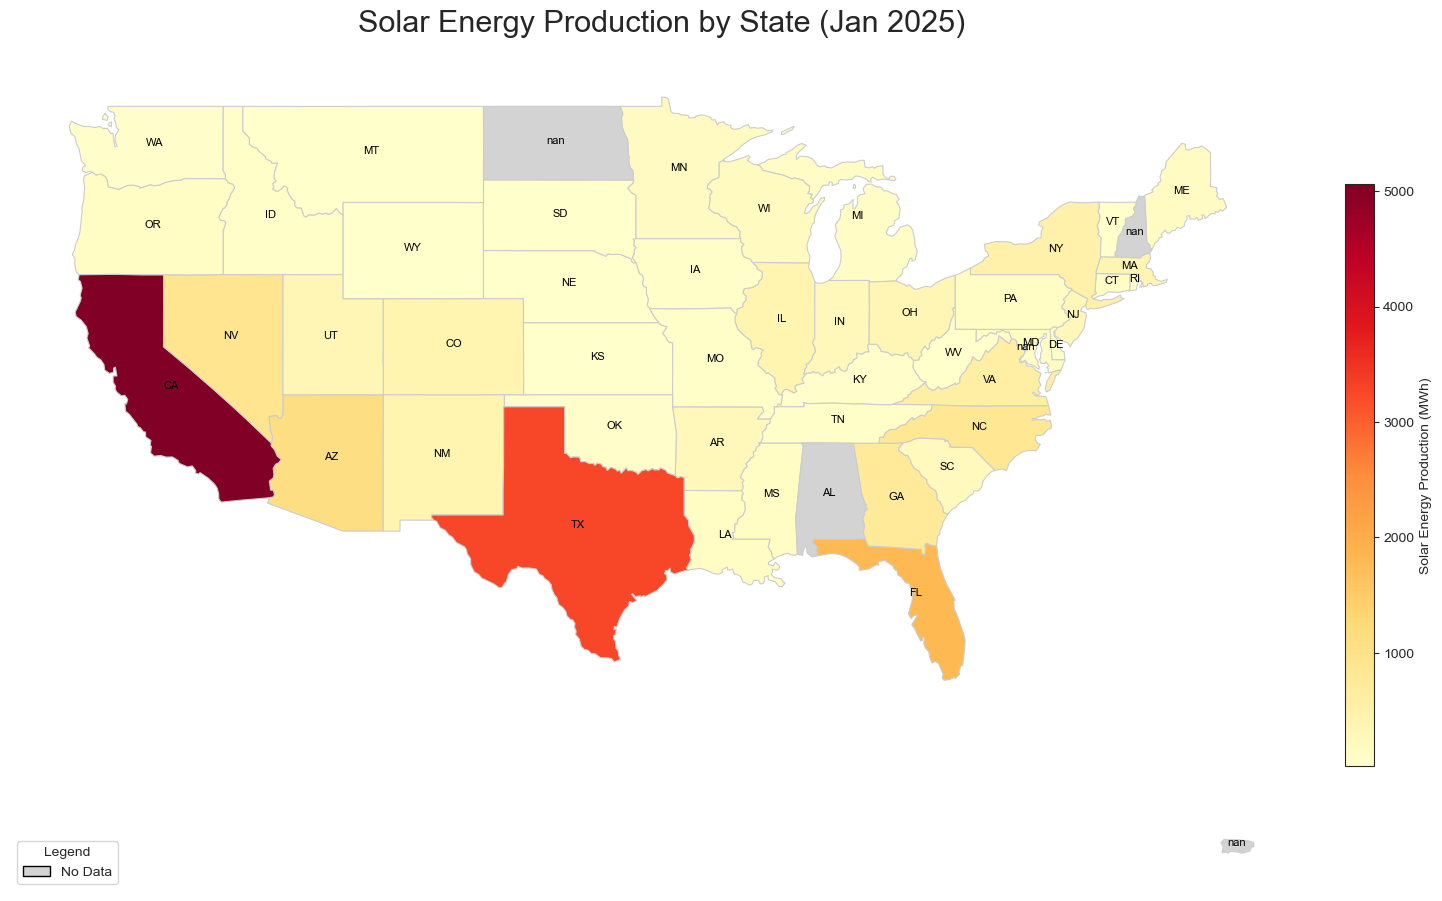

In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# --- Step 1: Prepare solar production data ---
solar_data = {
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
              'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
              'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
              'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
              'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
              'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
              'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
              'Wisconsin', 'Wyoming'],
    'Jan2025_Production': [None, None, 1116, 280, 5061, 425, 124, 22, 1805, 759, 170, 63, 424, 283, 87,
                            18, 44, 148, 161, 149, 374, 116, 177, 145, 89, 21, 16, 898, None, 301, 423,
                            518, 833, None, 366, 41, 138, 138, 59, 233, 19, 72, 3259, 342, 24, 584, 48,
                            17, 195, 28]
}
solar_df = pd.DataFrame(solar_data)

# --- Step 2: Load US states map ---
gdf_states = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')
gdf_states = gdf_states.rename(columns={"name": "State"})

# --- Step 3: Merge solar production data ---
merged = gdf_states.merge(solar_df, on="State", how="left")

# --- Step 4: Remove Alaska and Hawaii ---
merged = merged[~merged['State'].isin(['Alaska', 'Hawaii'])]

# --- Step 5: Add state abbreviations ---
state_abbrev = {
    'Alabama': 'AL', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE',
    'Nevada': 'NV', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
merged['abbrev'] = merged['State'].map(state_abbrev)

# --- Step 6: Plot ---
sns.set_style("white")
fig, ax = plt.subplots(figsize=(16, 10))

# Plot map
merged.plot(
    column='Jan2025_Production',
    cmap='YlOrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={
        'label': "Solar Energy Production (MWh)",
        'orientation': "vertical",
        'shrink': 0.6,
        'pad': 0.02
    },
    missing_kwds={
        "color": "lightgrey",
        "label": "No Data"
    }
)

# Add state abbreviations
for idx, row in merged.iterrows():
    plt.annotate(
        text=row['abbrev'],  # <-- Corrected here!
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        horizontalalignment='center',
        fontsize=8,
        color='black'
    )

# Create custom legend for "No Data"
no_data_patch = Patch(facecolor='lightgrey', edgecolor='black', label='No Data')
handles, labels = ax.get_legend_handles_labels()
handles.append(no_data_patch)
labels.append('No Data')
ax.legend(handles=handles, loc='lower left', fontsize='medium', title='Legend')

# Title and layout
ax.set_title("Solar Energy Production by State (Jan 2025)", fontdict={'fontsize': 22}, pad=20)
ax.set_axis_off()

plt.tight_layout()
plt.savefig('State_Solar_Production_with_State_Names.png', dpi=300, bbox_inches='tight')
plt.show()


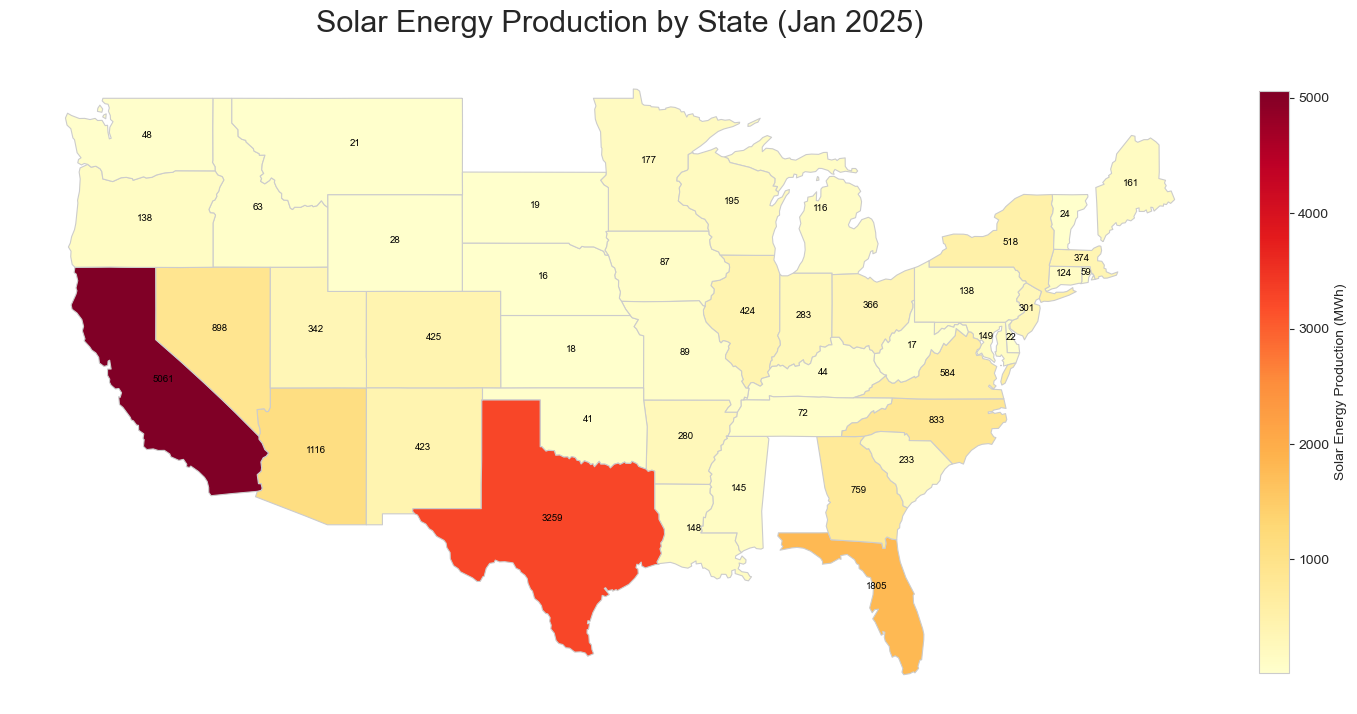

In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# --- Step 1: Prepare solar production data ---
solar_data = {
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
              'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
              'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
              'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
              'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
              'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
              'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
              'Wisconsin', 'Wyoming'],
    'Jan2025_Production': [None, None, 1116, 280, 5061, 425, 124, 22, 1805, 759, 170, 63, 424, 283, 87,
                            18, 44, 148, 161, 149, 374, 116, 177, 145, 89, 21, 16, 898, None, 301, 423,
                            518, 833, None, 366, 41, 138, 138, 59, 233, 19, 72, 3259, 342, 24, 584, 48,
                            17, 195, 28]
}
solar_df = pd.DataFrame(solar_data)

# --- Step 2: Load US states map ---
gdf_states = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')
gdf_states = gdf_states.rename(columns={"name": "State"})

# --- Step 3: Merge solar production data ---
merged = gdf_states.merge(solar_df, on="State", how="left")

# --- Step 4: Remove Alaska, Hawaii, and Puerto Rico ---
merged = merged[~merged['State'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

# --- Step 5: Keep only states with data ---
merged = merged.dropna(subset=['Jan2025_Production'])

# --- Step 6: Plot ---
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot map
merged.plot(
    column='Jan2025_Production',
    cmap='YlOrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={
        'label': "Solar Energy Production (MWh)",
        'orientation': "vertical",
        'shrink': 0.6,
        'pad': 0.02
    }
)

# Add production numbers on map
for idx, row in merged.iterrows():
    plt.annotate(
        text=int(row['Jan2025_Production']),
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        horizontalalignment='center',
        fontsize=7,
        color='black'
    )

# Title and layout
ax.set_title("Solar Energy Production by State (Jan 2025)", fontdict={'fontsize': 22}, pad=20)
ax.set_axis_off()

plt.tight_layout()
plt.savefig('State_Solar_Production_with_numbers.png', dpi=300, bbox_inches='tight')
plt.show()


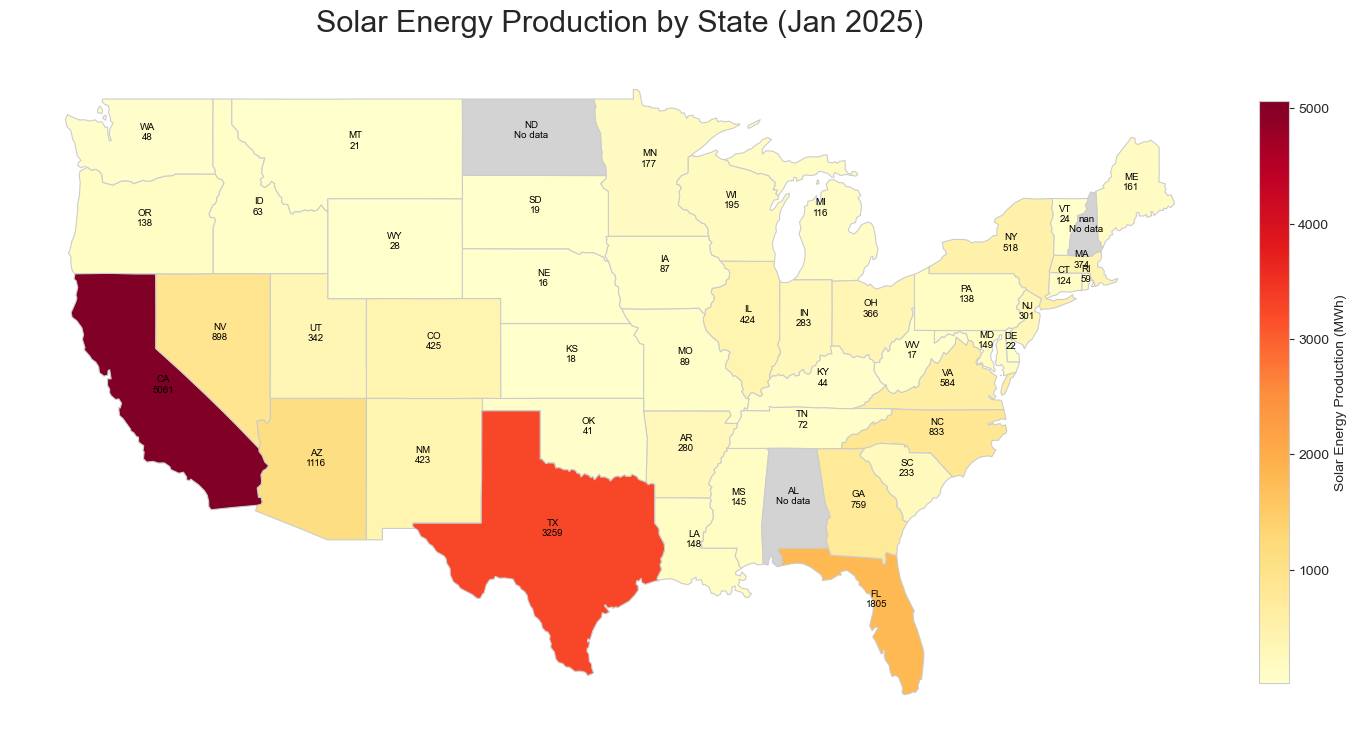

In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# --- Step 1: Prepare solar production data ---
solar_data = {
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
              'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
              'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
              'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
              'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
              'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
              'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
              'Wisconsin', 'Wyoming'],
    'Jan2025_Production': [None, None, 1116, 280, 5061, 425, 124, 22, 1805, 759, 170, 63, 424, 283, 87,
                            18, 44, 148, 161, 149, 374, 116, 177, 145, 89, 21, 16, 898, None, 301, 423,
                            518, 833, None, 366, 41, 138, 138, 59, 233, 19, 72, 3259, 342, 24, 584, 48,
                            17, 195, 28]
}
solar_df = pd.DataFrame(solar_data)

# --- Step 2: Load US states map ---
gdf_states = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')
gdf_states = gdf_states.rename(columns={"name": "State"})

# --- Step 3: Merge solar production data ---
merged = gdf_states.merge(solar_df, on="State", how="left")

# --- Step 4: Remove Alaska, Hawaii, Puerto Rico, and Washington DC ---
merged = merged[~merged['State'].isin(['Alaska', 'Hawaii', 'Puerto Rico', 'District of Columbia'])]

# --- Step 5: Add state abbreviations ---
state_abbrev = {
    'Alabama': 'AL', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE',
    'Nevada': 'NV', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}
merged['abbrev'] = merged['State'].map(state_abbrev)

# --- Step 6: Plot ---
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot map
merged.plot(
    column='Jan2025_Production',
    cmap='YlOrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={
        'label': "Solar Energy Production (MWh)",
        'orientation': "vertical",
        'shrink': 0.6,
        'pad': 0.02
    },
    missing_kwds={"color": "lightgrey"}
)

# Add state abbreviations and production numbers
for idx, row in merged.iterrows():
    production_text = f"{int(row['Jan2025_Production'])}" if pd.notnull(row['Jan2025_Production']) else "No data"
    plt.annotate(
        text=f"{row['abbrev']}\n{production_text}",
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        horizontalalignment='center',
        fontsize=7,
        color='black'
    )

# Title and layout
ax.set_title("Solar Energy Production by State (Jan 2025)", fontdict={'fontsize': 22}, pad=20)
ax.set_axis_off()

plt.tight_layout()
plt.savefig('State_Solar_Production_with_labels.png', dpi=300, bbox_inches='tight')
plt.show()


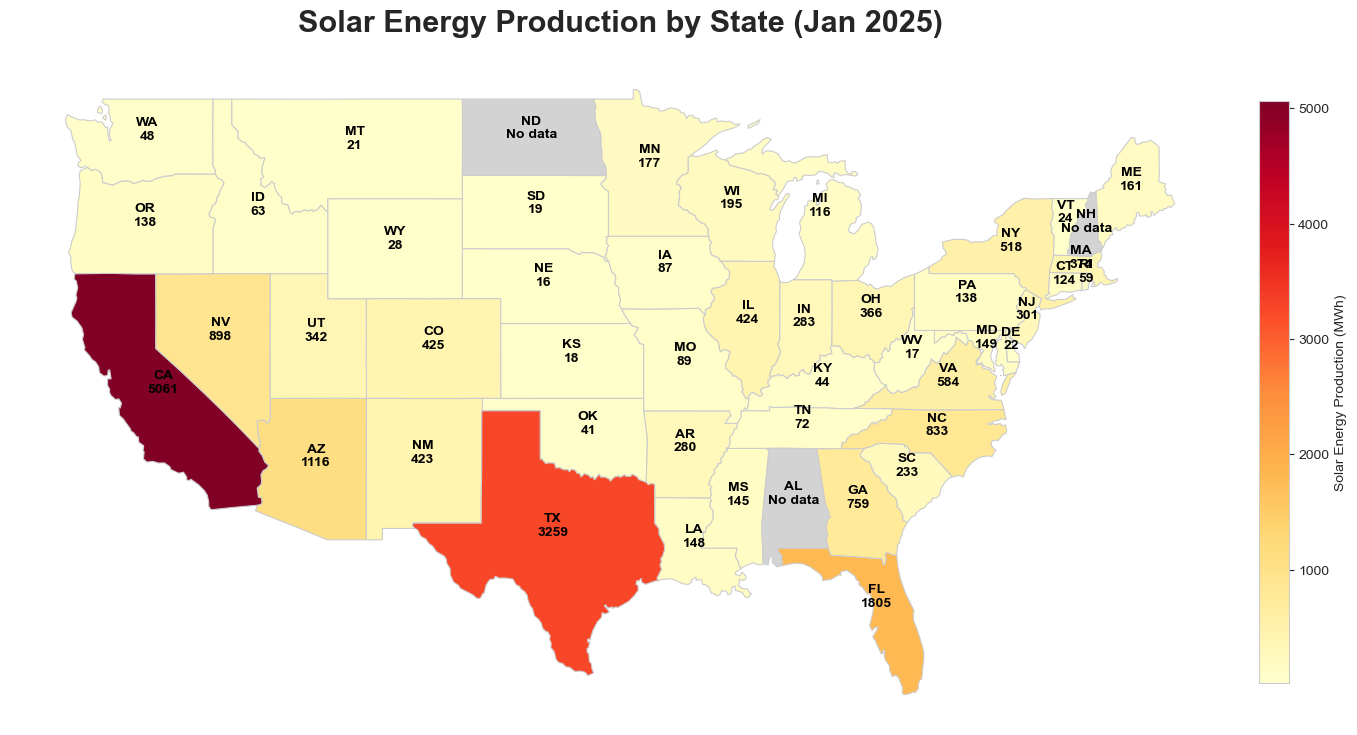

In [22]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# --- Step 1: Prepare solar production data ---
solar_data = {
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
              'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
              'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
              'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
              'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
              'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
              'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
              'Wisconsin', 'Wyoming'],
    'Jan2025_Production': [None, None, 1116, 280, 5061, 425, 124, 22, 1805, 759, 170, 63, 424, 283, 87,
                            18, 44, 148, 161, 149, 374, 116, 177, 145, 89, 21, 16, 898, None, 301, 423,
                            518, 833, None, 366, 41, 138, 138, 59, 233, 19, 72, 3259, 342, 24, 584, 48,
                            17, 195, 28]
}
solar_df = pd.DataFrame(solar_data)

# --- Step 2: Load US states map ---
gdf_states = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')
gdf_states = gdf_states.rename(columns={"name": "State"})

# --- Step 3: Merge solar production data ---
merged = gdf_states.merge(solar_df, on="State", how="left")

# --- Step 4: Remove Alaska, Hawaii, Puerto Rico, and Washington DC ---
merged = merged[~merged['State'].isin(['Alaska', 'Hawaii', 'Puerto Rico', 'District of Columbia'])]

# --- Step 5: Add state abbreviations ---
state_abbrev = {
    'Alabama': 'AL', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE',
    'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}
merged['abbrev'] = merged['State'].map(state_abbrev)

# --- Step 6: Plot ---
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot map
merged.plot(
    column='Jan2025_Production',
    cmap='YlOrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    legend_kwds={
        'label': "Solar Energy Production (MWh)",
        'orientation': "vertical",
        'shrink': 0.6,
        'pad': 0.02
    },
    missing_kwds={"color": "lightgrey"}
)

# Add state abbreviations and production numbers
for idx, row in merged.iterrows():
    if pd.notnull(row['Jan2025_Production']):
        production_text = f"{int(row['Jan2025_Production'])}"
    else:
        production_text = "No data"
        
    plt.annotate(
        text=f"{row['abbrev']}\n{production_text}",
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        horizontalalignment='center',
        fontsize=10,
        color='black',
        fontweight = 'bold'
    )

# Title and layout
ax.set_title(
    "Solar Energy Production by State (Jan 2025)",
    fontdict={'fontsize': 22, 'fontweight': 'bold'},  # Make title bold
    pad=20
)
ax.set_axis_off()

plt.tight_layout()
plt.savefig('State_Solar_Production_with_labels_corrected.png', dpi=300, bbox_inches='tight')
plt.show()
